- Book: Modern Computer Vision with PyTorch (by V Kishore Ayyadevara)

## Libraries

In [ ]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

# Feedforward Propagation

$a = f(w_o + \sum_{i=1}^n w_i x_i)$

- f: Activation Function
- x: input
- w: weight

Sigmoid Activation(x) = $\tfrac{1}{(1+e^{-x})}$

Mean Squared Error = $\tfrac{1}{m}\sum_{i=1}^m (y_i - ŷ_i)^{2}$

In [ ]:
def feed_forward(inputs, outputs, weights):
    # Applying the calculation between the input layer and the hidden layer
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    # Activation function
    hidden = 1 / (1 + np.exp(-pre_hidden))
    # Applying the calculation between the hidden layer and the output layer
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    # Calculating the Mean Squared Error
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error

# Backpropagation (Gradient Descent)

In [ ]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    # Calculating the loss value with the original set of weights
    original_loss = feed_forward(inputs, outputs, original_weights)
    # Looping through all the layers of the network
    for i, layer in enumerate(original_weights):
        # Looping through each parameter within a given list
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss) / (0.0001)
            updated_weights[i][index] -= grad * lr
    return updated_weights, original_loss

# Feedforward Propagation with Backpropagation

### Defining the Dataset

In [ ]:
x = np.array([[1, 1]])
y = np.array([[0]])

### Initialize the weight and bias values randomly

- Hidden layer has 3 nodes
- Input layer has 2 nodes
- Input - Hidden makes 6 connections (6 weights) and 3 bias
- Output layer has 1 node
- Hidden - Output makes 3 connections (3 weights) and 1 bias

In [ ]:
W = [
    # 2x3 matrix of weights that connects the input layer to the hidden layer
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    # Bias of each node of the hidden layer
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    # 3x1 matrix of weights that connects the hidden layer to the output layer
    np.array([[0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    # Bias of the output layer
    np.array([-0.5516], dtype=np.float32)
]

### Updating the weights over 100 epochs and fetching the loss and the updated weight values

In [ ]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)

Text(0, 0.5, 'Loss')

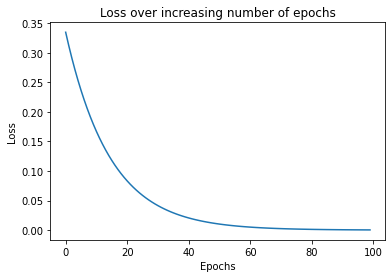

In [ ]:
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Updated Weights (Final)

In [ ]:
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

# Calculating the Output Value based on the Updated Weights

In [ ]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = 1 / (1 + np.exp(-pre_hidden))
pred_out = np.dot(hidden, W[2]) + W[3]
pred_out

array([[-0.0174781]])